# Signal Generator

## Valid Signal Generator Clocks

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SysClk = 80e6
SamplesPerPeriod = 2 * 500 * 16
Overhead = 16/17.5

In [4]:
def SSIClkGenerator():
    for multiplier in range(1, 18+1):
        for predivider in range(2, 254+1, 2):
            for divider in range(1, 256+1, 1):
                SSIFrequency = SysClk / (predivider*divider)
                Frequency = SSIFrequency * Overhead * multiplier / SamplesPerPeriod
                if Frequency >= 20.5 and SSIFrequency <= 20e6:
                    yield multiplier, predivider, divider, SSIFrequency, Frequency

In [5]:
data = pd.DataFrame(SSIClkGenerator(), columns=("multiplier", "predivider", "divider", "SSIFrequency", "Frequency"))

In [6]:
data = data.sort_values(by=["Frequency", "multiplier", "predivider", "divider"])

In [7]:
def UniqueGenerator(clk, name):
    last = None
    for index, line in clk.iterrows():
        if last != line[name]:
            last = line[name]
            yield line

In [8]:
data = pd.DataFrame(UniqueGenerator(data, "Frequency"))

In [9]:
n = 48
data["m"] = np.round(n * np.log10(data["Frequency"]))

In [10]:
data["error"] = ((10**data["m"])**(1/n) - data["Frequency"]) / data["Frequency"]

In [11]:
data["fom"] = (data["multiplier"]-1) * 0.025 + np.abs(data["error"])

In [12]:
data = data.sort_values(by=["m", "fom"])

In [13]:
data = pd.DataFrame(UniqueGenerator(data, "m"))

In [14]:
data

,multiplier,predivider,divider,SSIFrequency,Frequency,m,error,fom
109,1.0,2.0,111.0,3.603604e+05,20.592021,63.0,-0.002757,0.002757
104,1.0,2.0,106.0,3.773585e+05,21.563342,64.0,-0.000881,0.000881
99,1.0,2.0,101.0,3.960396e+05,22.630835,65.0,-0.001229,0.001229
94,1.0,2.0,96.0,4.166667e+05,23.809524,66.0,-0.004023,0.004023
90,1.0,2.0,92.0,4.347826e+05,24.844720,67.0,0.001381,0.001381
86,1.0,2.0,88.0,4.545455e+05,25.974026,68.0,0.004911,0.004911
81,1.0,2.0,83.0,4.819277e+05,27.538726,69.0,-0.005611,0.005611
78,1.0,2.0,80.0,5.000000e+05,28.571429,70.0,0.005545,0.005545
74,1.0,2.0,76.0,5.263158e+05,30.075188,71.0,0.002209,0.002209
70,1.0,2.0,72.0,5.555556e+05,31.746032,72.0,-0.003883,0.003883


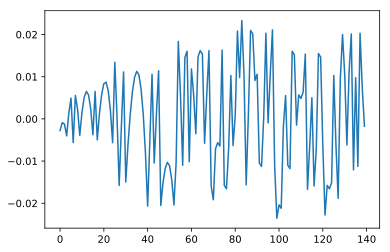

In [15]:
plt.plot(data["error"].values)

In [16]:
# Test wether we've got a distinct frequency value for every m
(data["m"].diff()[1:] == 1.0).all()

False

In [17]:
for i, (index, row) in enumerate(data.iterrows()):
    print("{{{}, {}, {}}}, // {} {}".format(int(row["multiplier"]), int(row["predivider"]), int(row["divider"]), i, round(row["Frequency"], 2)))

{1, 2, 111}, // 0 20.59
{1, 2, 106}, // 1 21.56
{1, 2, 101}, // 2 22.63
{1, 2, 96}, // 3 23.81
{1, 2, 92}, // 4 24.84
{1, 2, 88}, // 5 25.97
{1, 2, 83}, // 6 27.54
{1, 2, 80}, // 7 28.57
{1, 2, 76}, // 8 30.08
{1, 2, 72}, // 9 31.75
{1, 2, 69}, // 10 33.13
{1, 2, 66}, // 11 34.63
{1, 2, 63}, // 12 36.28
{1, 2, 60}, // 13 38.1
{1, 2, 57}, // 14 40.1
{1, 2, 54}, // 15 42.33
{1, 2, 52}, // 16 43.96
{1, 2, 49}, // 17 46.65
{1, 2, 47}, // 18 48.63
{1, 2, 45}, // 19 50.79
{1, 2, 43}, // 20 53.16
{1, 2, 41}, // 21 55.75
{1, 2, 39}, // 22 58.61
{1, 2, 37}, // 23 61.78
{1, 2, 35}, // 24 65.31
{1, 2, 34}, // 25 67.23
{1, 2, 32}, // 26 71.43
{1, 2, 30}, // 27 76.19
{1, 2, 29}, // 28 78.82
{1, 2, 28}, // 29 81.63
{1, 2, 26}, // 30 87.91
{1, 2, 25}, // 31 91.43
{1, 2, 24}, // 32 95.24
{1, 2, 23}, // 33 99.38
{1, 2, 22}, // 34 103.9
{1, 2, 21}, // 35 108.84
{1, 2, 20}, // 36 114.29
{1, 2, 19}, // 37 120.3
{1, 2, 18}, // 38 126.98
{1, 2, 17}, // 39 134.45
{1, 2, 16}, // 40 142.86
{2, 2, 31}, // 41 14